# NLE Assignment: Sentiment Classification

In this assignment, you will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [ ]:
candidateno=123456 #this MUST be updated to your candidate number so that you get a unique data sample


In [ ]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [ ]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the 
            pair is a list of the training data and the second is a list of the test data.
    """
    
    data = list(data)  
    n = len(data)  
    train_indices = random.sample(range(n), int(n * ratio))          
    test_indices = list(set(range(n)) - set(train_indices))    
    train = [data[i] for i in train_indices]           
    test = [data[i] for i in test_indices]             
    return (train, test)                       
 

def get_train_test_data():
    
    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')
   
    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]
   
    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [ ]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[500])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['with', 'storytelling', 'this', 'compelling', ',', ...], 'pos')


1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

In [ ]:
#essential imports and downloads
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')

#constructing bag of words
training_basic=[(FreqDist(wordlist),label) for (wordlist,label) in training_data]
#training_basic[0]
#for the testing
testing_basic=[(FreqDist(wordlist),label) for (wordlist,label) in testing_data]

#getting rid of stopwords and punctation, also lemmatizing
stop = stopwords.words('english')
lemm = WordNetLemmatizer()
def normalise(wordlist):
    token=[word for word in wordlist if word.isalpha() and word not in stop]
    number_normalisation = ["NUM" if token.isdigit() else token for token in token]
    filtered = [lemm.lemmatize(token) for token in number_normalisation]
    return filtered
##normalise(training_data[0][0])

#creating an insatnce variable for easier retriaval of data for the future
training_normalised=[(FreqDist(normalise(wordlist)),label) for (wordlist,label) in training_data]
#for the testing
testing_normalised=[(FreqDist(normalise(wordlist)),label) for (wordlist,label) in testing_data]
##list(training_normalised[1])

#checks the frequency of each word in our all training data, this is the part where it trains on the data
pos_freq_dist=FreqDist()
neg_freq_dist=FreqDist()
for reviewDist,label in training_normalised:
    if label=='pos':
        pos_freq_dist+=reviewDist
    else:
        neg_freq_dist+=reviewDist
        

def most_frequent_words(posfrequency,negfrequency,topk):
    diff=posfrequency-negfrequency
    sorteddiff=diff.most_common()
    most_common_words=[word for (word,freq) in sorteddiff[:topk]]
    return most_common_words

#creating an insatnce variable for top ten most frequent positive words in training documents
top_pos=most_frequent_words(pos_freq_dist,neg_freq_dist,10)

#creating an insatnce variable for top ten most frequent negative words in training documents
top_neg=most_frequent_words(neg_freq_dist,pos_freq_dist,10)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
#a list of 10 content words which are representative of the positive reviews in the training data
print(top_pos)

['film', 'life', 'also', 'well', 'great', 'story', 'many', 'performance', 'love', 'best']


In [ ]:
#a list of 10 content words which are representative of the negative reviews in the training data
print(top_neg)

['movie', 'bad', 'plot', 'get', 'even', 'minute', 'script', 'worst', 'nothing', 'guy']


Firstly, what I have to do is to train on the data provided so I could extract the top 10 most used vocabulary in positive and negative documents.

I have used freqdist to generate bag-of-words for each document and I made everything to be stored in a list, also I have kept the labels and made to be appeared at the end of list for the future. I ignore the ordering of the words in the documentation because I care which words are in the document not where in the sentence it is located. This was essential because we are looking for the vocabulary size.

After that, I had to make a function called normalise that applies pre-processing to my worldlists since the most common words were punctuation, stopwords, and some words had unwanted affixes. Therefore, I decided to apply function normalise to the worldlist, it will return list of tokens that are purely of content words. I am doing this because tokens such as punctuation  and stopwords are difficult or impossible to categorise. Furthermore, I made sure that the tokens will be stemmed since we do not want to distinguish  lexical variation and its morphological variants. This was essential because we are looking for the vocabulary size.

Later that, I recreated the bag-of-words representations and I made it to store the results in training_normalised. It makes use of normalise() function. I did this so I could get normalised tokens easily later on my code.

Next, I needed to find the frequency of each words occurring in our positive and negative training data in total. Therefore, I have put code where it returns a total of the FreqDists for positive data and for negative data.

Lastly, I have put a function most_frequent_words(), it takes two different total frequency distributions and a natural number, and then it returns the most freqent tokens/words in positive/negative class. Firstly, I get the difference between the two total frequency distributions.
After that, I have used the most_common() method from the FreqDist class - this returns a list of words, frequency pairs ordered by frequency. In the end, it returned a list of 10 content words which are representative of the positive/negative reviews in the training data

Finally, I have created variables for top ten most frequent words in positive/negative documents then I just printed them out separately.

2) 
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


In [ ]:
#essential imports
from nltk.classify.api import ClassifierI

#the class is a child of class called ClassifierI
class  My_word_list_classifier(ClassifierI): 
    #asking for positive and negative vocabulary
    def __init__(self, pos, neg): 
        self._pos = pos 
        self._neg = neg 
    
    def classify(self, doc): 
        score = 0
        for word,value in doc.items():
            if word in self._pos:
                score+=value
            if word in self._neg:
                score-=value
        return "neg" if score < 0 else "pos" 

    def labels(self): 
        return ("pos", "neg")


my_classifier = My_word_list_classifier(top_pos, top_neg)
#Example usage
my_classifier.classify(FreqDist("This movie was horrible".split()))

'neg'

Firstly, I have used ClassifierI class as my parent class for my classifier. ClassifierI is an interface for labeling tokens with category labels. I have used ClassifierI because the interface should be used for "single-category
classification" where the set of categories are known and the there is a finite number of categories. Also, each text/document belongs to exactly one
category.

After that, my constructor "__init__" will initialise positive and negative vocabulary which then will be used in the classify method.

I decided to take the approach of scoring the documents, meaning that if a document's score were negative then it would mean that the document is in a negative category, and vice versa with positive. The classify method is defined so that each occurrence of a negative vocabulary decrements the score, and each occurrence of a positive vocabulary increments the score. 

There was no need to define the classify_many method as it is provided in ClassifierI.

The labels method returns the list of category labels used by the classifier.

Finally, I created an instance variable called my_classifier.


3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

In [ ]:
class ConfusionMatrix:
    def __init__(self,predictions,goldstandard,classes=("pos","neg")):
    
        (self.c1,self.c2)=classes
        self.predictions=predictions
        self.TP=0
        self.FP=0
        self.FN=0
        self.TN=0
        for p,g in zip(predictions,goldstandard):
            if g==self.c1:
                if p==self.c1:
                    self.TP+=1
                else:
                    self.FN+=1
        
            elif p==self.c1:
                self.FP+=1
            else:
                self.TN+=1
        
    def accuracy(self):
        a=0
        a = (self.TP + self.TN)/(self.TP + self.TN + self.FP + self.FN)
        return a

    def precision(self):
        p=0
        p = self.TP / (self.TP + self.FP)
        return p
  
    def recall(self):
        r=0
        r = self.TP / (self.TP + self.FN)
        return r
  
    def f1(self):
        f1=0
        p=self.precision()
        r=self.recall()
        f1= 2*p*r/(p+r)
        return f1 
        

In [ ]:
docs,labels=zip(*testing_normalised)
senti_cm=ConfusionMatrix(my_classifier.classify_many(docs),labels)

print("The accuracy of the classifier is {}".format(senti_cm.accuracy()))
print("The precision of the classifier is {}".format(senti_cm.precision()))
print("The recall of the classifier is {}".format(senti_cm.recall()))
print("The F1 of the classifier is {}".format(senti_cm.f1()))

The accuracy of the classifier is 0.6216666666666667
The precision of the classifier is 0.5905707196029777
The recall of the classifier is 0.7933333333333333
The F1 of the classifier is 0.6770981507823612


It is a bad practice to evaluate/compare classifiers with accuracy, since it boils the performance of the model down to one number, and you are not seeing where classifiers getting things wrong, and where it's getting them right, and how it is achieving that. Particularly when there are imbalanced classes for example, 1% of documents are negative and other 99% are positive, then that would be quite misleading since a classifier that would label all the documents positive then its accuracy would have been 99% (which is wrong). Therefore, using other metrics for evaluation/comparison such as precision, recall and F1 score is safer and more useful.

However, the time that accuracy would be useful is when the number of different labelled documents are perfectly balanced, for example, 50% positive and 50% negative.

4) 
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results. 

[12.5\%]

In [ ]:
#essential imports
from nltk.probability import DictionaryProbDist, ELEProbDist, FreqDist, sum_logs
from nltk.classify.util import names_demo

nb_classifier = nltk.NaiveBayesClassifier.train(training_normalised)


In [ ]:
senti_cm=ConfusionMatrix(my_classifier.classify_many(docs),labels)
senti_cm_nbc=ConfusionMatrix(nb_classifier.classify_many(docs),labels)

def percentage(number):
  percentage_number = "{:.4%}".format(number)
  return percentage_number

print("The accuracy of Naive Bayes Classifier is {}".format(percentage(senti_cm_nbc.accuracy())))
print("The precision of Naive Bayes Classifier is {}".format(percentage(senti_cm_nbc.precision())))
print("The recall of Naive Bayes Classifier is {}".format(percentage(senti_cm_nbc.recall())))
print("The F1 of Naive Bayes Classifier is {}".format(percentage(senti_cm_nbc.f1())))
print("----------------------------------------------------")
print("The accuracy of my classifier is {}".format(percentage(senti_cm.accuracy())))
print("The precision of my classifier is {}".format(percentage(senti_cm.precision())))
print("The recall of my classifier is {}".format(percentage(senti_cm.recall())))
print("The F1 of my classifier is {}".format(percentage(senti_cm.f1())))

The accuracy of Naive Bayes Classifier is 74.0000%
The precision of Naive Bayes Classifier is 66.2896%
The recall of Naive Bayes Classifier is 97.6667%
The F1 of Naive Bayes Classifier is 78.9757%
----------------------------------------------------
The accuracy of my classifier is 62.1667%
The precision of my classifier is 59.0571%
The recall of my classifier is 79.3333%
The F1 of my classifier is 67.7098%


As we can see, overall, the Naïve Bayes Classifier beats in all of the metrics. Especially, in recall where the Naïve Bayes Classifier has got around 18.33% more than my classifier, this means that the Naïve Bayes is better at finding true positives, i.e., it is better at correctly predicting what category the documents actually belong to.

When it comes to precision, again, the Naïve Bayes Classifier is around 7.23%‬ better than my classifier, that means that the Naïve Bayes Classifier produces less false positives than my classifier. 

Due to the fact the Naïve Bayes Classifier has better recall and precision, the F1 score of the Naïve Bayes Classifier will automatically be better than my classifier. Respectively, the Naïve Bayes Classifier has achieved around 11.26% more in F1 score than my classifier. This gives us overall measure to say that the Naïve Bayes Classifier model is performing better than the classifier that uses 10 most frequent words.

5) 
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions. 

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


In [ ]:
class SimpleClassifier_mf(My_word_list_classifier):
    
    def __init__(self,k):
        self._k=k
    
    def train(self,training_data):
        pos_freq_dist=FreqDist()
        neg_freq_dist=FreqDist()

        for reviewDist,label in training_data:
            if label=='pos':
                pos_freq_dist+=reviewDist
            else:
                neg_freq_dist+=reviewDist
                
        self._pos=most_frequent_words(pos_freq_dist,neg_freq_dist,self._k)
        self._neg=most_frequent_words(neg_freq_dist,pos_freq_dist,self._k)
    
    


The F1 of 2WLS Word List Classifier classifier is 0.6463245492371705
The F1 of 50WLS Word List Classifier classifier is 0.7130214917825537
The F1 of 500WLS Word List Classifier classifier is 0.7309136420525658
The F1 of 2000WLS Word List Classifier classifier is 0.7123947051744886
The F1 of 2WLS Word List Classifier classifier is 0.6463245492371705
The F1 of 50WLS Word List Classifier classifier is 0.7130214917825537
The F1 of 500WLS Word List Classifier classifier is 0.7309136420525658
The F1 of 2000WLS Word List Classifier classifier is 0.7123947051744886
The F1 of 2WLS Word List Classifier classifier is 0.6463245492371705
The F1 of 50WLS Word List Classifier classifier is 0.7130214917825537
The F1 of 500WLS Word List Classifier classifier is 0.7309136420525658
The F1 of 2000WLS Word List Classifier classifier is 0.7123947051744886


,0,1
0,2WLS Word List Classifier,0.646325
1,50WLS Word List Classifier,0.713021
2,500WLS Word List Classifier,0.730914
3,2000WLS Word List Classifier,0.712395


(0.0, 1.0)

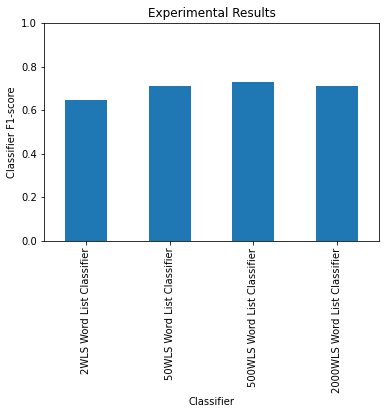

In [ ]:
distinct_hyperparameter_classifiers={"2WLS Word List Classifier":SimpleClassifier_mf(2),
             "50WLS Word List Classifier":SimpleClassifier_mf(50),
             "500WLS Word List Classifier":SimpleClassifier_mf(500),
             "2000WLS Word List Classifier":SimpleClassifier_mf(2000)}

number_of_runs=3
results={}
for key in distinct_hyperparameter_classifiers.keys():
    results[key]=0

for i in range(number_of_runs):
    training,testing=get_train_test_data()
    docs,labels=zip(*testing_normalised)
    for name,classifier in distinct_hyperparameter_classifiers.items():
        classifier.train(training_normalised)
        cm=ConfusionMatrix(classifier.classify_many(docs),labels)   
        print("The F1 of {} classifier is {}".format(name,cm.f1()))
        results[name]=results[name]+(cm.f1()/number_of_runs)

df = pd.DataFrame(list(results.items()))
display(df)
ax = df.plot.bar(title="Experimental Results",legend=False,x=0)
ax.set_ylabel("Classifier F1-score")
ax.set_xlabel("Classifier")
ax.set_ylim(0,1.0)

# Design Decision
I considered the following length of the wordlists: 2, 50, 500, and 2000.

I have used F1 as the measurement since F1 score is the overall measure to say which model is performing best. I decided to run this experiment 3 times, meaning that the F1 results (on the graph) for each classifier is the average across three runs.

After that, I plot the F1 results on the bar chart graph. I plot the F1 results on the y axis, and the classifiers on the x axis. 

# Conclusion
We can see on the graph that classifier with 2 word length size has scored the worst overall. Whereas, classifier with 500 word length size has scored the best overall. However, this does not mean that the bigger the hyperparameter the better the classifier, this is visible when we look at 2000 word length size classifier, we can see that it has scored 0.018519 less than the 500 one. This can be attributed to the model becoming too complex with the increased word length size, which may be introducing unnecessary noise or variance into the model, causing the performance to drop.

# Word List vs Naïve Bayes
The Naïve Bayes Classifier is still a better classifier since its F1 score was 78.9757%; scored 0.058843 more‬ than the best word list classifier in the experiment. Therefore, I would recommend the Naïve Bayes Classifier for the future use. 

In [ ]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 437

import io
from nbformat import current

from google.colab import drive
drive.mount('/content/drive')

filepath='/content/drive/My Drive/NLE Notebooks/NLassignment2022.ipynb'
question_count=437

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Submission length is 1044
